In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('task2.csv')
df

,Time_Step,Acceleration_mps2
0,1,9.508503
1,2,9.386115
2,3,9.611985
3,4,10.058718
4,5,10.085938
...,...,...
995,996,9.831726
996,997,10.179112
997,998,9.546105
998,999,9.963044


In [7]:
ps = pd.Series(df)
print(ps)

0       9.508503
1       9.386115
2       9.611985
3      10.058718
4      10.085938
         ...    
995     9.831726
996    10.179112
997     9.546105
998     9.963044
999     9.859943
Name: Acceleration_mps2, Length: 1000, dtype: float64


In [11]:
rolling_mean = ps.rolling(window=10).mean()
rolling_std = ps.rolling(window=10).std()
print(rolling_mean)
print(rolling_std)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
995    9.736604
996    9.763940
997    9.755661
998    9.826583
999    9.824476
Name: Acceleration_mps2, Length: 1000, dtype: float64
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
995    0.370341
996    0.393574
997    0.397581
998    0.359552
999    0.359259
Name: Acceleration_mps2, Length: 1000, dtype: float64


In [47]:
anom = df.loc[np.abs(df['Acceleration_mps2']-rolling_mean)> (2 * rolling_std)]
print(new_df)

     Time_Step  Acceleration_mps2
3            4          10.058718
4            5          10.085938
6            7          10.017529
10          11          10.040123
11          12          10.026287
..         ...                ...
978        979          10.140686
984        985          10.166925
993        994          10.396183
994        995          10.073409
996        997          10.179112

[255 rows x 2 columns]


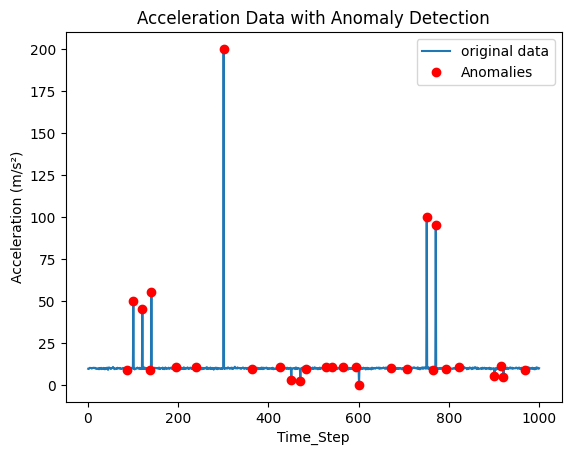

In [48]:
plt.plot(df['Time_Step'],df['Acceleration_mps2'])
plt.plot(anom['Time_Step'],anom['Acceleration_mps2'],'o',color='red')
plt.xlabel('Time_Step')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration Data with Anomaly Detection')
plt.legend(['original data','Anomalies'])
plt.show()